In [1]:
import pandas as pd     
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
pwd  # Mengetahui lokasi saat ini

'C:\\Users\\Teguh\\Downloads\\Toronto Bikeshare Data'

In [3]:
#Read datasheet
df1 =pd.read_csv(r"C:\Users\Teguh\Downloads\Toronto Bikeshare Data\2017 Data\Bikeshare Ridership (2017 Q1).csv")
df2 =pd.read_csv(r"C:\Users\Teguh\Downloads\Toronto Bikeshare Data\2017 Data\Bikeshare Ridership (2017 Q2).csv")
df3 =pd.read_csv(r"C:\Users\Teguh\Downloads\Toronto Bikeshare Data\2017 Data\Bikeshare Ridership (2017 Q3).csv")
df4 =pd.read_csv(r"C:\Users\Teguh\Downloads\Toronto Bikeshare Data\2017 Data\Bikeshare Ridership (2017 Q4).csv")

In [4]:
df = df1.copy() # Membuat datasheet utama
df = df.append([df2, df3, df4], sort=False) # Menggabungkan 3 datasheet menjadi 1 dengan append

In [5]:
df.head() 

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,1/1/2017 0:00,1/1/2017 0:03,223,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member
1,712383,1/1/2017 0:00,1/1/2017 0:05,279,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member
2,712384,1/1/2017 0:05,1/1/2017 0:29,1394,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member
3,712385,1/1/2017 0:07,1/1/2017 0:21,826,7077.0,College Park South,7010.0,King St W / Spadina Ave,Member
4,712386,1/1/2017 0:08,1/1/2017 0:12,279,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Member


<h3>Exploratory Data Analysis</h3>

In [6]:
df.dtypes # Cek format data

trip_id                    int64
trip_start_time           object
trip_stop_time            object
trip_duration_seconds      int64
from_station_id          float64
from_station_name         object
to_station_id            float64
to_station_name           object
user_type                 object
dtype: object

In [7]:
df.describe() # Informasi tentang data

,trip_id,trip_duration_seconds,from_station_id,to_station_id
count,1.492369e+06,1.492369e+06,465476.000000,465476.000000
mean,1.553653e+06,1.017616e+03,7077.085429,7076.123059
std,4.758046e+05,9.772787e+03,60.256824,59.839325
min,7.123820e+05,0.000000e+00,7000.000000,7000.000000
25%,1.147384e+06,4.150000e+02,7028.000000,7028.000000
50%,1.558955e+06,6.540000e+02,7059.000000,7059.000000
75%,1.961202e+06,1.020000e+03,7121.000000,7118.000000
max,2.383646e+06,6.382030e+06,7216.000000,7216.000000


In [8]:
total_trip =len(df["trip_id"].unique())                    # Mengetahui jumlah trip_id dengan len dan filter dengan unique 
total_trip

1492369

In [9]:
len(df["user_type"].unique())                               # Mengetahui jumlah user_type 

2

In [10]:
varian_user =(df.iloc[:,8]).unique()                        # Mengetahui jenis user_type 
varian_user

array(['Member', 'Casual'], dtype=object)

In [11]:
total_to_station =len(df["to_station_name"].unique())          # Mengetahui jumlah to_station-name  
total_to_station 

294

In [12]:
total_from_station =len(df["from_station_name"].unique())       # Mengetahui jumlah from_station_name
total_from_station

293

In [13]:
df = df.dropna(subset=['from_station_name','to_station_name'])        # Cleaning data

In [14]:
route = df.copy()
route = route[['from_station_name','to_station_name']]

Pisahkan menjadi 2 kategori yaitu two-ways(kembali ke tempat asal) dan  one-way(tidak kembali ke tempat asal/stasiun yang berbeda)

In [15]:
twoway = route.copy()
twoway = twoway[twoway.from_station_name == twoway.to_station_name]
oneway = route.copy()
oneway = oneway[oneway.from_station_name != oneway.to_station_name]

In [16]:
twoway_map = twoway.groupby('from_station_name').count().sort_values(by='to_station_name', ascending=False)
print('stasiun peringkat atas hingga akhir twoway') 
twoway_map[:294]

stasiun peringkat atas hingga akhir twoway


,to_station_name
from_station_name,
Ontario Place Blvd / Remembrance Dr,3802
Bay St / Queens Quay W (Ferry Terminal),3468
York St / Queens Quay W,2333
HTO Park (Queens Quay W),1366
Queens Quay / Yonge St,1239
...,...
Landsdowne Subway Green P,11
Dufferin Gate - SMART,10
Dundas St W / Roncesvalles Green P - SMART,7


In [17]:
print('10 stasiun peringkat atas hingga akhir twoway') 
twoway_map[:10]

10 stasiun peringkat atas hingga akhir twoway


,to_station_name
from_station_name,
Ontario Place Blvd / Remembrance Dr,3802
Bay St / Queens Quay W (Ferry Terminal),3468
York St / Queens Quay W,2333
HTO Park (Queens Quay W),1366
Queens Quay / Yonge St,1239
Queens Quay W / Lower Simcoe St,1184
Dockside Dr / Queens Quay E (Sugar Beach),1174
Bremner Blvd / Rees St,1156
Queens Quay W / Dan Leckie Way,1149


In [18]:
oneway_map = oneway.groupby('from_station_name').count().sort_values(by='to_station_name', ascending=False)
print('stasiun peringkat atas hingga akhir oneway')
oneway_map[:294]

stasiun peringkat atas hingga akhir oneway


,to_station_name
from_station_name,
Union Station,21395
Simcoe St / Wellington St W,20592
Bay St / Wellesley St W,17646
King St W / Spadina Ave,17290
Bay St / College St (East Side),16987
...,...
Summerhill Ave / MacLennan Ave - SMART,185
Dundas St W / Roncesvalles Green P - SMART,180
Victoria Park Subway Station - SMART,126


In [19]:
print('10 stasiun peringkat atas hingga akhir oneway')
oneway_map[:10]

10 stasiun peringkat atas hingga akhir oneway


,to_station_name
from_station_name,
Union Station,21395
Simcoe St / Wellington St W,20592
Bay St / Wellesley St W,17646
King St W / Spadina Ave,17290
Bay St / College St (East Side),16987
Queen St W / Portland St,16883
York St / Queens Quay W,16810
Front St W / Blue Jays Way,15504
Simcoe St / Queen St W,14749


In [20]:
# Jumlah total_twoway
total_twoway =twoway_map.sum() 
total_twoway

to_station_name    71722
dtype: int64

In [21]:
# Jumlah total_oneway
total_oneway = oneway_map.sum()
total_oneway

to_station_name    1420646
dtype: int64

<h3> Data Visualization </h3>
Top 10 stations ranked two-way.

In [56]:
# Data
init_stasiun = ['Ontario Place Blvd / Remembrance Dr', 'Bay St / Queens Quay W (Ferry Terminal)', 'York St / Queens Quay W', 
                'HTO Park (Queens Quay W)', 'Queens Quay / Yonge St', 'Queens Quay W / Lower Simcoe St', 
                'Dockside Dr / Queens Quay E (Sugar Beach)', 'Bremner Blvd / Rees St', 'Queens Quay W / Dan Leckie Way', 
                'Humber Bay Shores Park West']
data = [3802, 3468, 2333, 1366, 1239, 1184, 1174, 1156, 1149, 953]

In [57]:
explode = (0.3, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.1)  # Variasi di pie chart
colors = ("orange", "brown", "cyan", "grey", "lime", "beige", "green", "yellow", "pink", "khaki")
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

In [58]:
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues))  # Percentase
    return "{:.1f}%\n({:d})".format(pct, absolute)

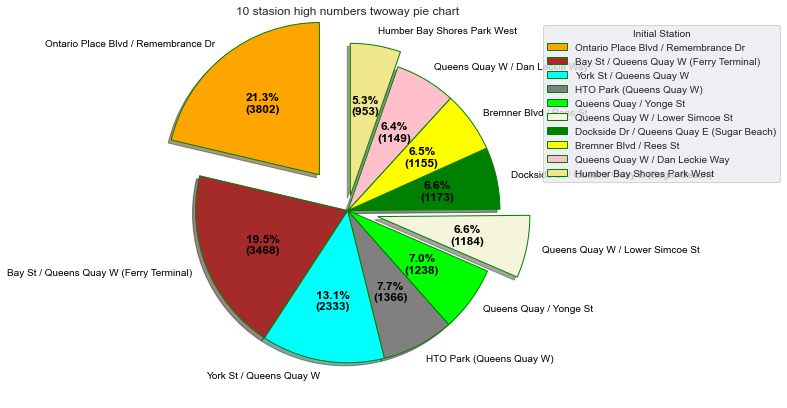

In [62]:
fig, ax = plt.subplots(figsize =(10, 7))   
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = init_stasiun,
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
ax.legend(wedges, init_stasiun, 
          title ="Initial Station", 
          loc ="best", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 12, weight ="bold") 
ax.set_title("10 stasion high numbers twoway pie chart") 
  
# show plot 
plt.show() 

<h3>A).Find out what percentage of bikes are returned to its initial location?(Answer)</h3>
Percentage of the bicycle visualization returned to its original location.

In [26]:
# Data
total_ways = ['Initial station', 'Other Station'] 
data = [71722, 1420646] 

In [27]:
def func(pct, allvalues):                          # Percentase
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute)

In [46]:
explode = (0.1, 0.0)                              # Variasi di pie chart
colors = ("orange", "khaki")
wp = { 'linewidth' : 1, 'edgecolor' : "blue" }

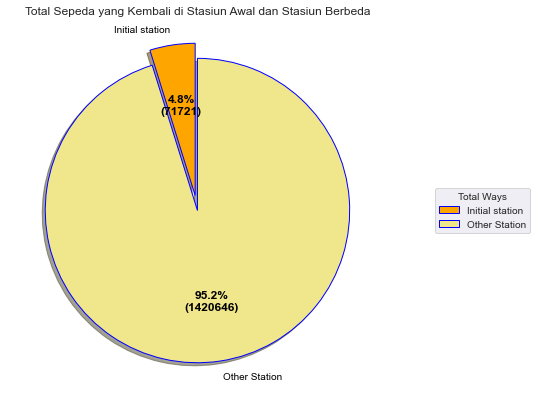

In [49]:
fig, ax = plt.subplots(figsize =(10, 7))          # Ploting pie chart
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = total_ways,
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
ax.legend(wedges, total_ways, 
          title ="Total Ways", 
          loc ="center", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 12, weight ="bold") 
ax.set_title("Total Sepeda yang Kembali di Stasiun Awal dan Stasiun Berbeda") 
  
# show plot 
plt.show() 

<h5>Kesimpulannya</h5>
Sepeda yang kembali ke asal stasiun awal hanya 4,8 % dari total keseluruhan sepeda <br>
<ul>Hal ini dibuktikan dengan data seperti berikut    
    <li>Jumlah Sepeda yang Kembali ke Awal Stasiun    :    71.721 </li>
    <li>Jumlah Sepeda yang Kembali ke Stasiun Berbeda : 1.420.646 </li>
    <li>Jumlah Keseluruhan Sepeda di Semua Stasiun    : 1.492.369 </li>
    <li>Jumlah Total Trip Sepeda : 1.492.368 </li>
    <li>Jumlah Total Stasiun yang menjadi Tujuan(sebelum cleaning data) : 294 </li>
    <li>Jumlah Total Stasiun yang menjadi Tujuan(setelah cleaning data) : 293 </li>
    <li>Jumlah Total Stasiun yang menjadi Awal(sebelum cleaning data) : 293 </li>
    <li>Jumlah Total Stasiun yang menjadi Awal(setelah cleaning data) : 293 </li>
</ul>   
Terdapat 3 trip_id yang dimana data tersebut tidak terlacak akan tetapi tidak mempengaruhi persentase sepeda yang kembali ke awal stasiun sebesar 4,8% <br>
Catatan: <br>
3 trip_id bisa terlacak dengan memplotkan stasiun tujuan akhir dengan mapping pada peta dan korelasikan rata2 duration second untuk mendapatkan jaraknya,serta menentukan posisi stasiun yang terdekat dari data trip tersebut.


<h3>B).How many bikeshare trips before the end of the day?(Answer)</h3>
Visualization 

In [30]:
df2017 =df.copy()
df2017['trip_start_time'] = pd.to_datetime(df2017['trip_start_time']) # Convert ke format to_datetime
df2017['trip_stop_time'] = pd.to_datetime(df2017['trip_stop_time'])

In [31]:
# Convert trip_start_time
df2017['hour_start'] = df2017['trip_start_time'].apply(lambda time: time.hour)
df2017['month_start'] = df2017['trip_start_time'].apply(lambda time: time.month)
df2017['weekday_start'] = df2017['trip_start_time'].apply(lambda time: time.dayofweek)

In [32]:
# Convert trip_stop_time
df2017['hour_stop'] = df2017['trip_stop_time'].apply(lambda time: time.hour)
df2017['month_stop'] = df2017['trip_stop_time'].apply(lambda time: time.month)
df2017['weekday_stop'] = df2017['trip_stop_time'].apply(lambda time: time.dayofweek)

In [33]:
# Month value
mon = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df2017['month_start'] = df2017['month_start'].map(mon)
df2017['month_stop'] = df2017['month_stop'].map(mon)

In [34]:
# Day value
day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df2017['weekday_start'] = df2017['weekday_start'].map(day)
df2017['weekday_stop'] = df2017['weekday_stop'].map(day)

<h3>Data Visualization</h3>
Bikeshare Trip 2017 Monthly

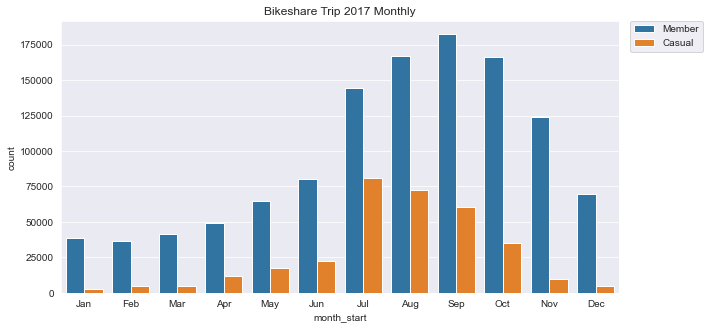

In [43]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
bikeshare_monthly = sns.countplot(data=df2017, x='month_start', hue='user_type', palette='tab10')
plt.title('Bikeshare Trip 2017 Monthly')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

<h3>Data Visualization</h3>
Bikeshare Trip 2017 Weekday

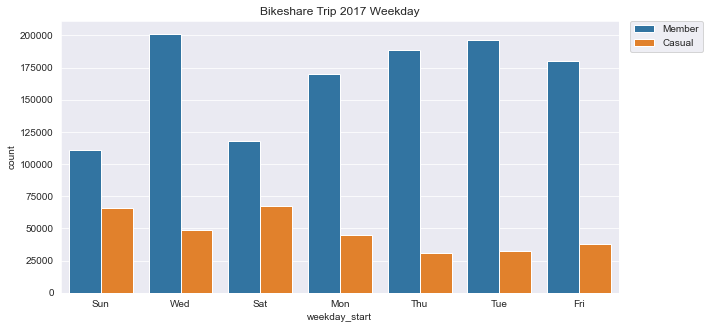

In [42]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
bikeshare_weekday = sns.countplot(data=df2017, x='weekday_start', hue='user_type', palette='tab10')
plt.title('Bikeshare Trip 2017 Weekday')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

<h5>Kesimpulannya</h5>
Berdasarkan visualisasi diatas,didapat informasi bikeshare trip baik member maupun casual sebagai berikut <br>
<ul>Bikeshare Trip 2017 Montly
    <li>Terdapat lonjakan peningkatan tertinggi bikeshare member pada bulan Juli-September dan puncaknya pada bulan September </li>
    <li>Tercatat pada bulan Agustus,September dan Oktober mencapai diatas 150.000 bikeshare member</li>
    <li>Terjadi penurunan pada bulan Oktober-Desember dan pada bulan Desember terjadi penurunan yang drastis yaitu 50.000 member</li>
    <li>Peningkatan tertingi pada casual terjadi pada bulan Juli yang berjumlah >75.000 </li>
    <li>Terjadi penurunan pada casual pada bulan Agustus-Desember</li>
</ul>   
<ul>Bikeshare Trip 2017 Weekday
    <li>Hari yang diminati oleh bikeshare member adalah hari rabu yang mencapai 200.000 </li>
    <li>Hari yang kurang diminati oleh bikeshare member adalah hari sabtu dan minggu</li>
    <li>Hari yang diminati oleh bikeshare casual adalah hari sabtu dan minggu</li>
    <li>Hari yang kurang diminati oleh bikeshare casual adalah hari selasa dan kamis </li>
</ul>   
Pada bikeshare member puncak tertinggi terjadi pada bulan September dengan hari yang diminati yaitu hari rabu mencapai 200.000, sedangkan untuk bikeshare casual puncak tertingi tejadi pada bulan Juli dengan hari yang diminati yaitu hari sabtu dan minggu mecapai kisaran 75.000 <br>
